# 作业5：直方图均衡

### 灰度图像直方图均衡
编写PYTHON代码实现灰度图像的直方图均衡，比较均衡前后的效果

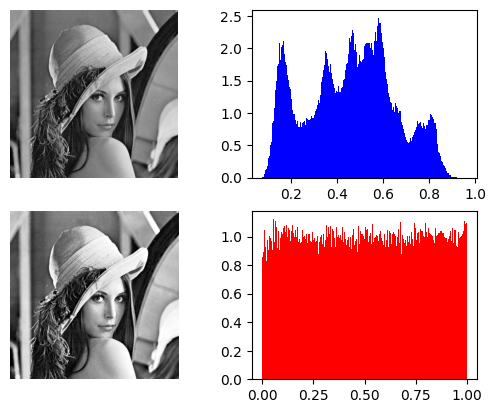

In [18]:
import numpy as np
from skimage import io, exposure, color
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread("lenna.jpg")
imgG = color.rgb2gray(img)
plt.subplot(221)
plt.axis('off')
plt.imshow(imgG,plt.cm.gray)
arr = imgG.flatten()
plt.subplot(222)
plt.hist(arr, bins=256, density=True, edgecolor='None', facecolor='blue')

img1=exposure.equalize_hist(imgG)
arr1=img1.flatten()
plt.subplot(223)
plt.axis('off')
plt.imshow(img1,plt.cm.gray)  #均衡化图像
plt.subplot(224)
plt.hist(arr1, bins=256, density=True,edgecolor='None',facecolor='red') #均衡化直方图

plt.show()

### 对彩色图像进行均衡化

这里选用了HSV方法，
HSV（Hue, Saturation, Value） 是一种颜色空间：
- H（色调）：表示颜色的种类，如红色、蓝色等。
- S（饱和度）：表示颜色的纯度，值越大，颜色越纯。
- V（亮度）：表示颜色的亮度，值越大，颜色越亮。
L 通道表示亮度，进行直方图均衡化，提升图像亮度的对比度。对于彩色图像，均衡化通常只作用于亮度通道（如 HSV 空间的 V 通道或 LAB 空间的 L 通道）。这可以避免影响颜色信息，保持颜色的自然性。

处理过后与photoshop处理的进行比较

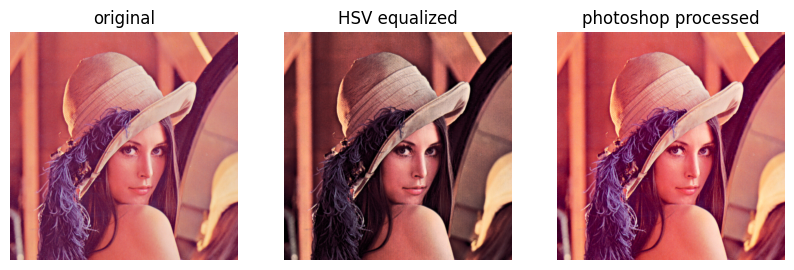

In [19]:
# 读取彩色图像
img = io.imread('lenna.jpg')

# 将图像转换为 HSV 颜色空间
img_hsv = color.rgb2hsv(img)

# 对 V 通道进行直方图均衡化
img_hsv[:, :, 2] = exposure.equalize_hist(img_hsv[:, :, 2])

img_equalized = color.hsv2rgb(img_hsv)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title("original")

plt.subplot(1, 3, 2)
plt.imshow(img_equalized)
plt.axis('off')
plt.title("HSV equalized")

plt.subplot(1, 3, 3)
imageps = io.imread('lenna_ps.jpg')
plt.imshow(imageps)
plt.axis('off')
plt.title("photoshop processed")
plt.show()


### 阅读附件"Exact Hitogram Specification"第二部分和第三部分，写出精确直方图均衡的算法原理

大致原理为：
- 计算输入图像的累积分布函数（CDF）：首先对输入图像的灰度直方图进行累积，得到累积分布函数。
- 计算目标图像的累积分布函数：目标图像可以是某个已有图像，或者人为设定的一个目标直方图。对目标图像也进行直方图统计和累积，得到目标的 CDF。
- 生成映射表：通过对比输入图像的 CDF 和目标图像的 CDF，生成一个灰度值的映射表，将输入图像的灰度值精确映射为目标图像的灰度值。
- 应用映射：根据映射表，对输入图像的像素进行变换，得到匹配后的图像。

这里使用skimage中的match_histograms方法来实现

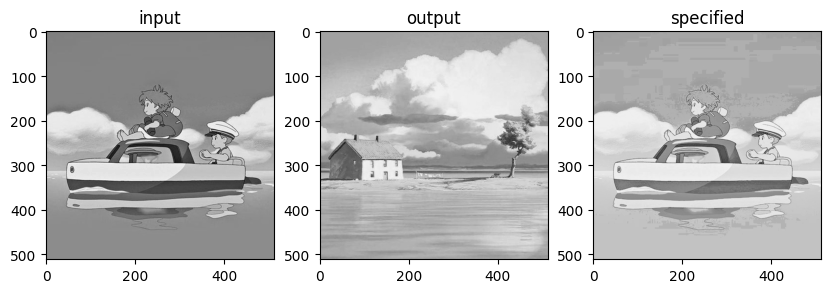

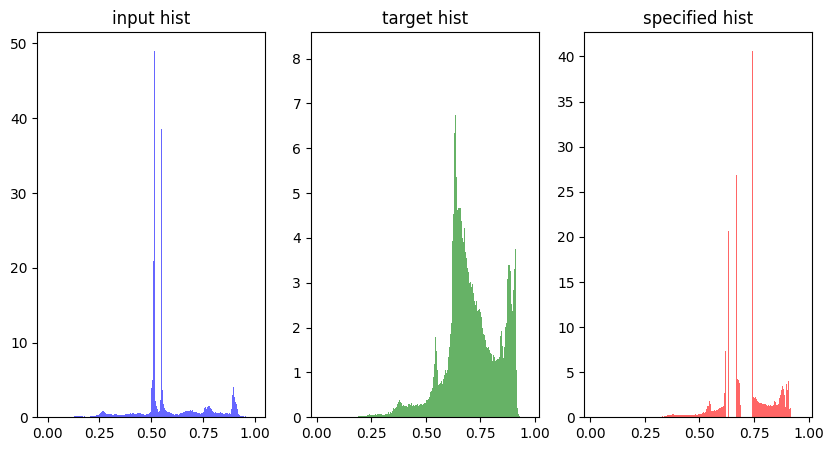

In [23]:
input_image = io.imread('input_image.jpg', as_gray=True)   #
target_image = io.imread('target_image.jpg', as_gray=True)

# 使用 match_histograms 进行精确直方图匹配
matched_image = exposure.match_histograms(input_image, target_image, channel_axis=None)

# 显示原始图像、目标图像、匹配后的图像
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(input_image, cmap='gray')
axes[0].set_title("input")

axes[1].imshow(target_image, cmap='gray')
axes[1].set_title("output")

axes[2].imshow(matched_image, cmap='gray')
axes[2].set_title("specified")

plt.show()

# 对比直方图
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.hist(input_image.ravel(), bins=256, density=True, color='blue', alpha=0.6)
plt.title("input hist")

plt.subplot(132)
plt.hist(target_image.ravel(), bins=256, density=True, color='green', alpha=0.6)
plt.title("target hist")

plt.subplot(133)
plt.hist(matched_image.ravel(), bins=256, density=True, color='red', alpha=0.6)
plt.title("specified hist")


plt.show()
